# Part 2(regression)
#### Name: YAGIZ SEZERSAN


#### a. Load the python library


In [83]:
# Necessary libraries for Lab4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

#### b. Read the data

In [84]:
# Import csv file
df = pd.read_csv("car_emission.csv")

# Display the first few rows of dataset
df.head()

,make,type,transmission,fuel,fuel_comb,emissions,engine(l),cylinder
0,mazda,two_seater,automatic_shift,z,7.9,186,2.0,4
1,dodge,full_size,automatic,e,14.0,234,3.6,6
2,mercedes_benz,full_size,automatic,z,15.1,355,6.0,12
3,infiniti,suv,continuously_variable,x,8.7,200,2.5,4
4,jeep,suv,continuously_variable,x,11.1,255,2.4,4


In [85]:
# Display the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          6444 non-null   object 
 1   type          6444 non-null   object 
 2   transmission  6444 non-null   object 
 3   fuel          6444 non-null   object 
 4   fuel_comb     6444 non-null   float64
 5   emissions     6444 non-null   int64  
 6   engine(l)     6444 non-null   float64
 7   cylinder      6444 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 402.9+ KB


#### c. Drop the unneeded data

In [86]:
# First we need to see how many null values we have
df.isnull().sum().sum()

0

In [87]:
# Check unique values for object columns
print(df.make.value_counts())
print()

print(df.type.value_counts())
print()

print(df.transmission.value_counts())
print()

print(df.fuel.value_counts())

ford             628
chevrolet        587
bmw              527
mercedes_benz    419
porsche          376
toyota           330
gmc              328
audi             286
nissan           259
jeep             251
dodge            246
kia              231
honda            214
hyundai          210
mini             204
volkswagen       197
mazda            180
lexus            178
jaguar           160
cadillac         158
subaru           140
volvo            124
infiniti         108
buick            103
Name: make, dtype: int64

compact       1742
suv           1714
mid_size      1014
pickup         610
full_size      510
van_wagon      428
two_seater     364
other           62
Name: type, dtype: int64

automatic_shift          2736
automatic                1564
manual                   1096
automated_manual          541
continuously_variable     507
Name: transmission, dtype: int64

x    3238
z    2735
e     322
d     149
Name: fuel, dtype: int64


In [88]:
# Drop make columns since there many different unique values
df.drop(["make"], axis = 1, inplace = True)

#### d. Create dummy values for the dataframe

In [89]:
# Create dummy variables
df1 = pd.get_dummies(df, drop_first=True)

In [90]:
# Now all columns are numerical
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   fuel_comb                           6444 non-null   float64
 1   emissions                           6444 non-null   int64  
 2   engine(l)                           6444 non-null   float64
 3   cylinder                            6444 non-null   int64  
 4   type_full_size                      6444 non-null   uint8  
 5   type_mid_size                       6444 non-null   uint8  
 6   type_other                          6444 non-null   uint8  
 7   type_pickup                         6444 non-null   uint8  
 8   type_suv                            6444 non-null   uint8  
 9   type_two_seater                     6444 non-null   uint8  
 10  type_van_wagon                      6444 non-null   uint8  
 11  transmission_automatic              6444 no

In [91]:
# Save cleaned dataset
df1.to_csv("car_emission_cleaned.csv", index=False)

####  e. Prepare the features and target variable

In [92]:
# Assign features and target
X = df1.drop(["emissions"],axis = 1)
y = df1["emissions"]

# Split data as test an training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

####  f. Create a pipeline

In [93]:
# Generate pipeline with related regressors models
names = ["LinearRegression", "DecisionTreeRegressor", "RandomForestRegressor", " GradientBoostingRegressor",
         "AdaBoostRegressor", "XGBRegressor","CatBoostRegressor","LGBMRegressor","SGDRegressor"]

scores = []
r2 = []
rmse = []

# Define a list of regressors
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth= 5),
    RandomForestRegressor(n_estimators= 100),
    GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 100),
    AdaBoostRegressor(n_estimators= 100),
    XGBRegressor(learning_rate= 0.1),
    CatBoostRegressor(iterations= 100),
    LGBMRegressor(learning_rate= 0.1, n_estimators= 100),
    SGDRegressor(max_iter= 1000, tol= 1e-3, eta0= 0.01) 
]
# Choose Robust scaler
for regressor in regressors:
    pipeline = Pipeline([
        ("scaler",RobustScaler()),
        ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100))),
        ("regressor",regressor),
    ])
    pipeline.fit(X_train, y_train)
    Y_pred = pipeline.predict(X_test)
    r2.append(pipeline.score(X_test, y_test))
    rmse.append(mean_squared_error(y_test, Y_pred, squared=False))
    print(regressor)
    scores.append(pipeline.score(X_test, y_test))
    print("Model score: %.3f "%pipeline.score(X_test, y_test))
    print("\n---------------------------\n")

LinearRegression()
Model score: 0.827 

---------------------------

DecisionTreeRegressor(max_depth=5)
Model score: 0.886 

---------------------------

RandomForestRegressor()
Model score: 0.898 

---------------------------

GradientBoostingRegressor()
Model score: 0.898 

---------------------------

AdaBoostRegressor(n_estimators=100)
Model score: 0.859 

---------------------------

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constra

In [94]:
# Generate table for easy view of scores
scores_df = pd.DataFrame(zip(names,r2, rmse), columns=['regressor', 'Accuracy', 'RMSE_Score'])
scores_df.sort_values(by=['Accuracy', 'RMSE_Score'], ascending=[False,True])

,regressor,Accuracy,RMSE_Score
5,XGBRegressor,0.898311,17.031759
2,RandomForestRegressor,0.898263,17.035762
3,GradientBoostingRegressor,0.898098,17.049532
6,CatBoostRegressor,0.897838,17.071271
7,LGBMRegressor,0.895083,17.299917
1,DecisionTreeRegressor,0.885771,18.051327
4,AdaBoostRegressor,0.858657,20.079771
0,LinearRegression,0.827238,22.199612
8,SGDRegressor,0.827214,22.201181


####  g. Select the best pipe

In [95]:
# Apply again same steps with best pipe which is XGBRegressor
bestPipe = Pipeline([
        ("scaler",RobustScaler()),
        ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100))),
        ("regressor",XGBRegressor(learning_rate= 0.1)),
    ])
bestPipe.fit(X_train, y_train)
Y_pred = bestPipe.predict(X_test)

Text(0.5, 1.0, 'XGBRegressor')

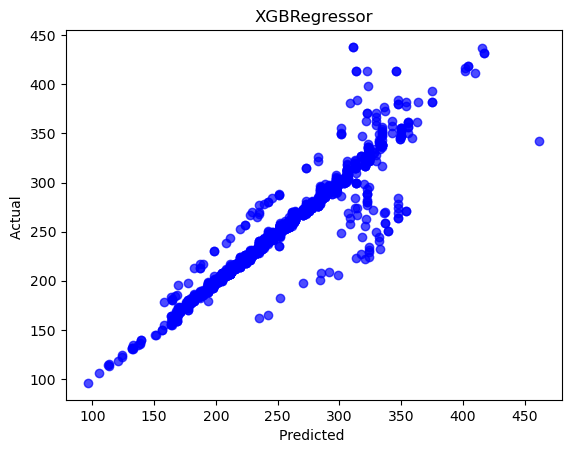

In [96]:
# Generate plot for actual vs predicted values
plt.scatter(Y_pred, y_test, alpha=.7, color='b') 
plt.xlabel('Predicted ')
plt.ylabel('Actual ')
plt.title('XGBRegressor')